# Exercise 02

## Group # 5
 - Nelson Aldana     - Cod: 201924128
 - Sebastian Camargo - Cod: 201014744
 - Viviana Muñoz     - Cod: 201920081
 - Diego Ojeda       - cod: 201924250

Ultima prueba para subir

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
sns.set()

In [3]:
#Definimos la funcion creadora de la serie dado un Rho
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

In [4]:
R_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.0]

for i in R_values:
    ts1 = ts(rho=i)
    #ts1.plot()
    result = adfuller(ts1)
    print('Valor de Rho %f' %  i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Valor de Rho 0.000000
ADF Statistic: -3.829028
p-value: 0.002624
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Valor de Rho 0.100000
ADF Statistic: -9.042882
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Valor de Rho 0.200000
ADF Statistic: -11.637798
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Valor de Rho 0.300000
ADF Statistic: -8.994717
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Valor de Rho 0.400000
ADF Statistic: -9.888255
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Valor de Rho 0.500000
ADF Statistic: -8.415767
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Valor de Rho 0.600000
ADF Statistic: -7.217022
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Valor de Rho 0.700000
ADF Statistic: -4.968867
p-value: 0.000026
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Valor de Rho 0.800000
ADF Statistic: -3.936392


Podemos observar que para un valor de Rho superior a 0.94 la serie ya no se considera estacional

# 02.2 Download and explore two series from google trends

Se decidió descargar de google trends las busquedas asociadas a las palabras "summer" y "travel.

In [42]:
data = pd.read_csv("multiTimeline.csv", skiprows=1)

In [44]:
data.info()

,Mes,summer: (Todo el mundo),travel: (Todo el mundo)
0,2004-01,26,98
1,2004-02,28,92
2,2004-03,33,91
3,2004-04,40,89
4,2004-05,45,88


In [46]:
data.columns = ["Month",'Summer', 'Travel']
data.head()

,Month,Summer,Travel
0,2004-01,26,98
1,2004-02,28,92
2,2004-03,33,91
3,2004-04,40,89
4,2004-05,45,88


In [48]:
data.month = pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)

data.head()

,Summer,Travel
Month,,
2004-01,26,98
2004-02,28,92
2004-03,33,91
2004-04,40,89
2004-05,45,88


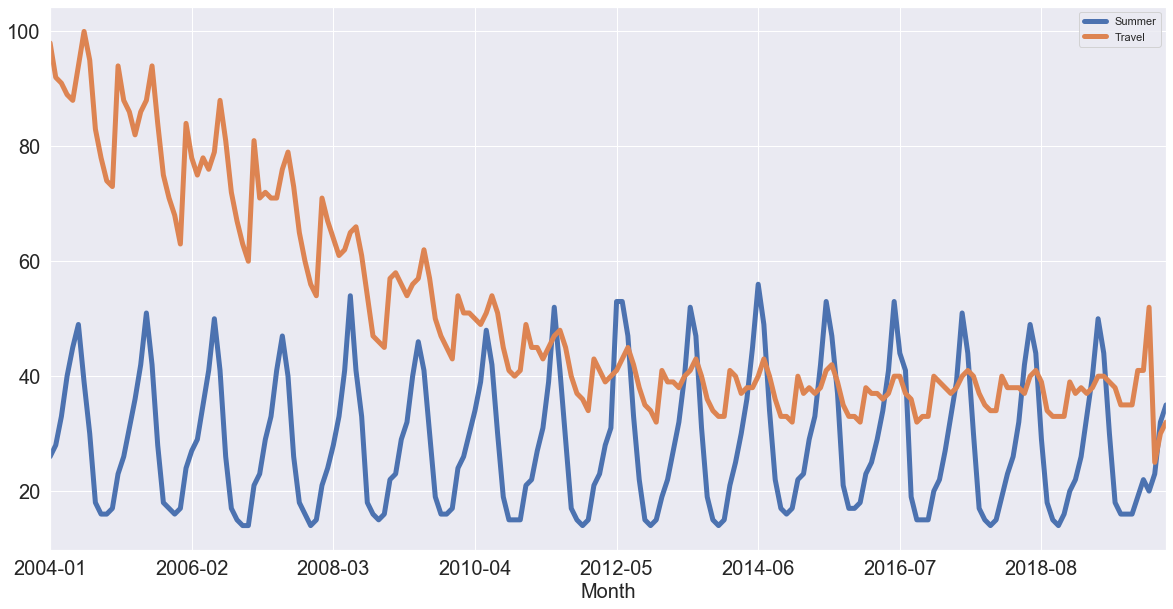

In [66]:
# Graficamos las series
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

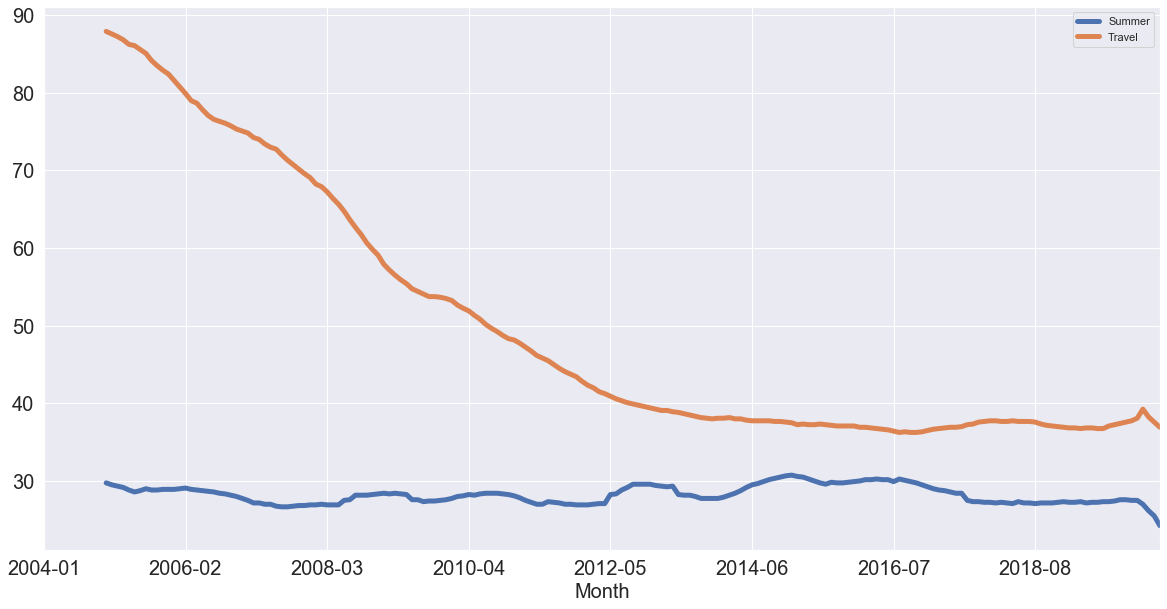

In [54]:
# Graficar promedio movil
data[['Summer', 'Travel']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

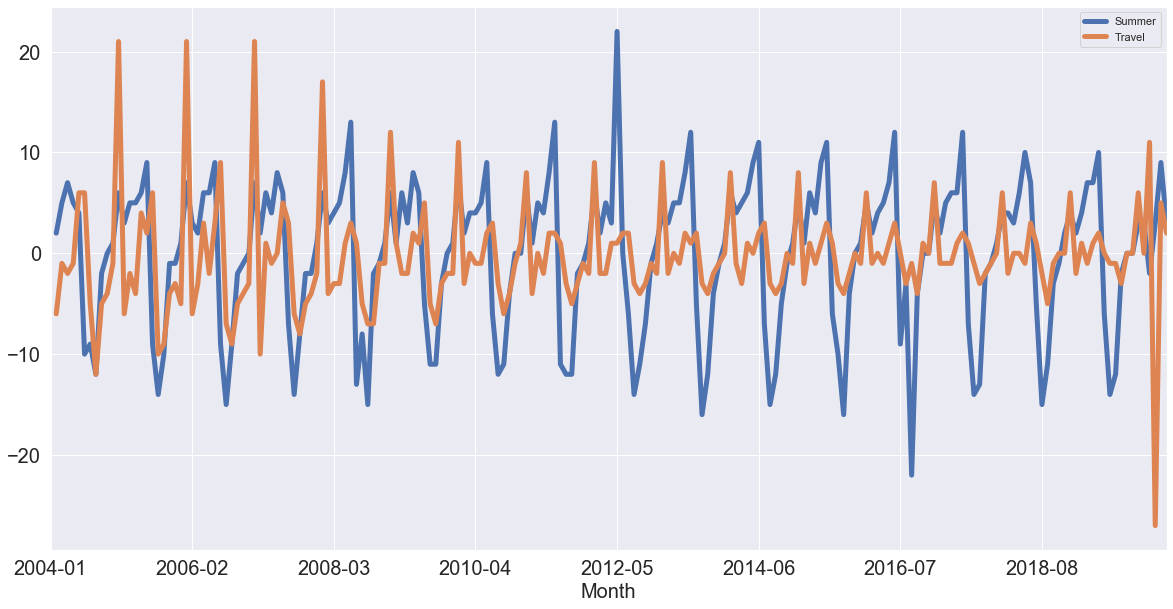

In [57]:
# Grafica series difernciadas
data[['Summer', 'Travel']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

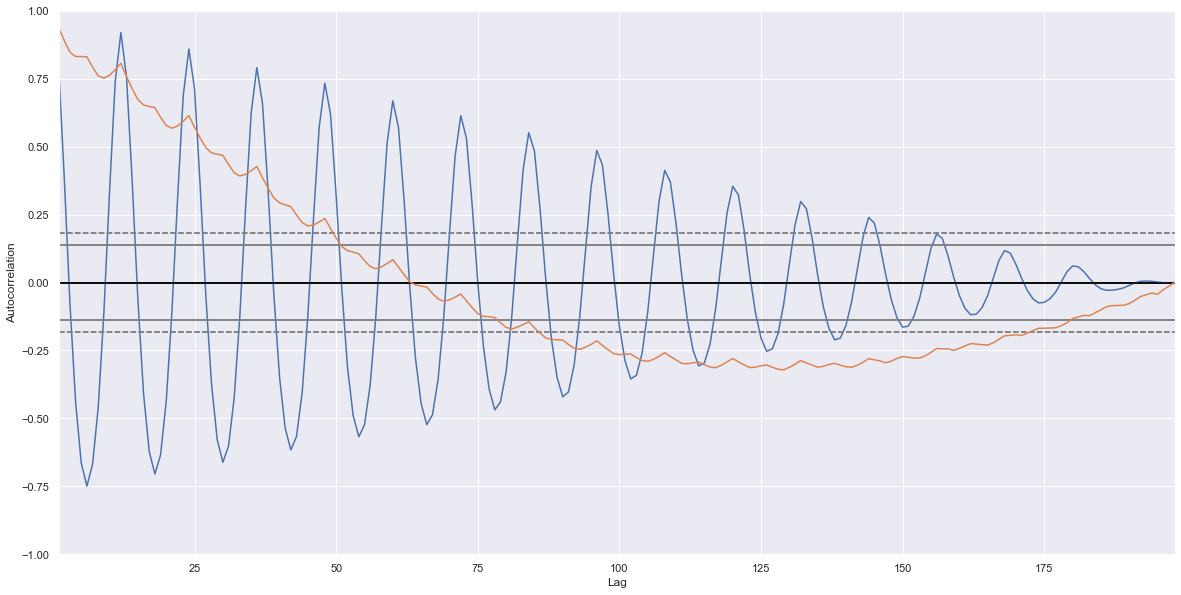

In [59]:
# Correlacion entre dos series

summ = data[['Summer']]
trav = data[['Travel']]

plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(summ);
pd.plotting.autocorrelation_plot(trav);

Podemos observar una estacionalidad cada 12 meses para las busquedas de "summer" (como era de esperarse) y una estacionalidad de 6 meses para "travel".

In [60]:
# Encontrar estacionalidad

result = adfuller(data["Summer"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
result = adfuller(data["Travel"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.585506
p-value: 0.490870
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575
ADF Statistic: -2.931514
p-value: 0.041804
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


Observamos que la serie "summer" no pasa la prueba de estacionalidad, en cambio, la serie "travel" si la pasa.

In [61]:
result = adfuller(data['Summer'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
       
result = adfuller(data['Travel'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.574310
p-value: 0.006272
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
ADF Statistic: -2.258901
p-value: 0.185566
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


Observamos que al diferenciar ambas seris, la serie "summer" ahora si pasa la prueba de estacionalidad, sin embargo, la serie "travel" ahora no pasa la prueba.

In [62]:
# Correlaciones serie sin diferenciar
data.corr()

,Summer,Travel
Summer,1.000000,0.188574
Travel,0.188574,1.000000


In [64]:
# Correlaciones serie diferenciada
data.diff().corr()

,Summer,Travel
Summer,1.000000,0.369146
Travel,0.369146,1.000000


Podemos concluir que la correlacion entre las dos series mejora luego de realizar la diferenciacion.